# Lecture 3a - Digital Images

<br><br>

In the world of modern computers and smart phones, images are generally collected as digital information

There are a discrete number of pixels and each pixel has a finite range of values

Today's cameras can capture an image with a tremendous resolution with a few thousand pixels in both the vertical and horizontal dimensions

Each pixel contains a single value that represents a level of intensity or three values which represent a color

An image of size (1,000 x 4,000 x 3) would contain 12,000,000 pixels and each pixel can have more than 16,000,000 different combinations values to create a color

This amount of data is huge and so it is necessary to compress the information when storing in on a disk

The use of the incorrect compression technique can have devastating effects on the image

Therefore it is prudent to understand the basics of image resolution and the most popular image compression methods

<br><br>

I will show three methods by which Python can load an image

The first uses the Python Image Library to load an image data type and then convert this to a matrix or tensor

The second method uses the imagio library commands

The third using OpenCV an industry standard for image analysis

<br><br><br><br>

### Example using our bird image

<br><br>


Method 1: PIL


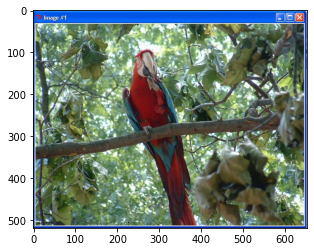


Method 2: imageio


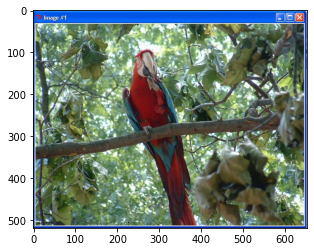

ModuleNotFoundError: No module named 'cv2'

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import urllib

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'

# Method 1
from PIL import Image

mg = Image.open(urllib.request.urlopen(url))
data = np.array(mg)
print('\nMethod 1: PIL')
plt.imshow(mg)
plt.show()

# Method 2
import imageio

adata = imageio.imread(url)
print('\nMethod 2: imageio')
plt.imshow(adata)
plt.show()

# Method 3
import cv2
import requests

resp = requests.get(url, stream=True).raw
image = np.asarray(bytearray(resp.read()), dtype="uint8")
adata = cv2.imdecode(image, cv2.IMREAD_COLOR)
print('\nMethod 3: OpenCV')
print('\nOOPS the colors are not correct')
print('\nOpenCV color order is BGR not RGB as in PILLOW')
plt.imshow(adata)
plt.show()

im_rgb = cv2.cvtColor(adata, cv2.COLOR_BGR2RGB)
print('\nMethod 3: OpenCV corrected colors')
plt.imshow(im_rgb)
plt.show()


<br><br><br><br><br><br>

## Resolution

There are two types of resolution in an image
1. Intensity resolution - represents the range of values that each pixel can have
2. Spatial resolution - is the size of the image in terms of the number of pixels

<br><br><br><br>

### Intensity

The intensity resolution of an image refers to the number of gray levels that each pixel can realize

Quite commonly a pixel in a grayscale image will have 256 different intensity levels

This is a convenient number since it extends beyond the discrimination ability of most humans

The bird image is a color image and loading it as a grayscale image from a file is represented by<br>

$\mathbf{b}[\bar{x}]=\mathcal{L}_{L} Y\left(\text { "data } / \text { bird. } j \mathrm{pg}^{\prime \prime}\right)$<br>

where the subscript <b>L</b> represents the grayscale model.

In the following example an image is loaded using the as_gray=True returns, the image as floating point values

These are converted to unsigned 8-bit integers so that each pixel represented by 8 binary values or 256 levels of intensity

<b>"mgdata & 0xFC" </b> creates a new image in which the six highest bits are kept and the lowest two bits are all set to 0

This reduces the spatial resolution from 256 gray levels to only 64 gray levels. The process is described as<br>

$\mathbf{c}[\vec{x}]=\Delta_{F 0} \mathbf{b}[\vec{x}]$<br><br><br>


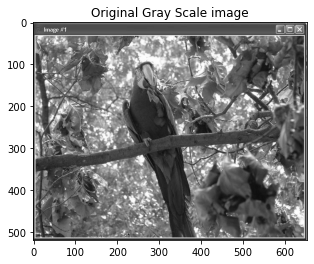

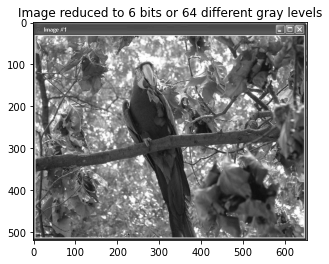

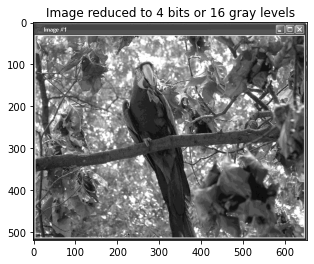

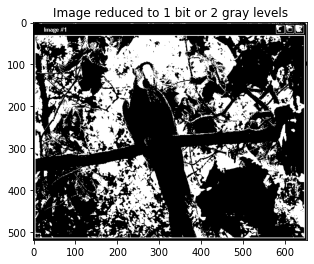

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd
import numpy as np

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
mgdata = imageio.imread(url, as_gray=True).astype(np.uint8)

#  10101010 - image pixel
#  11111100 - select my grayscale levels
#  10101000

c1 = mgdata & 0xFC  #  6 bit or 64 gray levels
c2 = mgdata & 0xF0  #  4 bit or 16 gray levels
c3 = mgdata & 0x80  #  1 bit or 2 gray levels

plt.title('Original Gray Scale image')
plt.imshow(mgdata, cmap='gray')
plt.show()
 
plt.title('Image reduced to 6 bits or 64 different gray levels')
plt.imshow(c1, cmap='gray')
plt.show()

plt.title('Image reduced to 4 bits or 16 gray levels')
plt.imshow(c2, cmap='gray')
plt.show()

plt.title('Image reduced to 1 bit or 2 gray levels')
plt.imshow(c3, cmap='gray')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br>

### Spatial Resolution

Spatial resolution is often equated to the number of pixels in an image, but this is not exactly correct

The number of pixels may be V x H, where V is the number of pixels in the vertical dimension and H is the number of pixels in the horizontal dimension, the spatial resolution would be V times H

The custom is that images provide the spatial dimensions with the horizontal value first

Custom also dictates that the opposite is true for matrices, and the vertical dimension is shown first

The spatial resolution of an image can be reduced using the Downsample operator $\Downarrow_n$

The subscript indicates the formula for sampling and can take many different forms

The operator $\Downarrow_2$ would extract every second row and every second column from the data, thus creating a new image that was half of the size of the original in both dimensions

The operator $\Downarrow_{m,n}$ would extract every m-th row and n-th column

For example the operator

${\bf c}[\vec x] = \Downarrow_2 {\bf b}[\vec x]$<br>

would sample even numbered rows and columns creating a new image ${\bf c}[\vec x]$ that is half of the size of
the original image ${\bf b}[\vec x]$ in every dimension

<br><br><br><br>



Original Gray Scale image


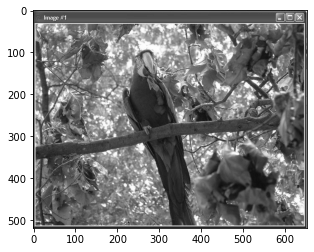


Down-sampled by a factor of 2


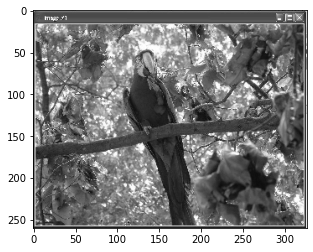


Down-sampled by a factor of 4


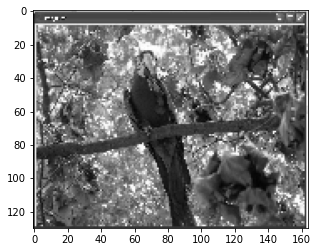


Down-sampled by a factor of 8


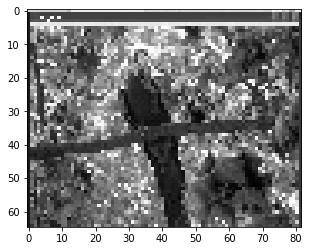


Down-sampled by a factor of 16


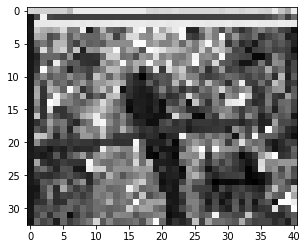


Down-sampled by a factor of 32


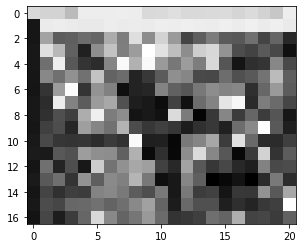

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd
import numpy as np

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
mgdata = imageio.imread(url, as_gray=True).astype(np.uint8)

print('\nOriginal Gray Scale image')
plt.imshow(mgdata, cmap='gray')
plt.show()

down_sampled = mgdata[0::2,0::2]
print('\nDown-sampled by a factor of 2')
plt.imshow(down_sampled, cmap='gray')
plt.show()

down_sampled = mgdata[0::4,0::4]
print('\nDown-sampled by a factor of 4')
plt.imshow(down_sampled, cmap='gray')
plt.show()

down_sampled = mgdata[0::8,0::8]
print('\nDown-sampled by a factor of 8')
plt.imshow(down_sampled, cmap='gray')
plt.show()

down_sampled = mgdata[0::16,0::16]
print('\nDown-sampled by a factor of 16')
plt.imshow(down_sampled, cmap='gray')
plt.show()

down_sampled = mgdata[0::32,0::32]
print('\nDown-sampled by a factor of 32')
plt.imshow(down_sampled, cmap='gray')
plt.show()


<br><br><br><br>

## Digital Formats

Storing an image digitally can be a simple concept in which each pixel is stored in three bytes (one each for color channel)

However, this is extremely inefficient and can produce very large files

For example, a  common smart phone can capture an image that is 4,160 times 2,340, which is over 9.7 million pixels

Furthermore, this image is a color image which means that it would take over 29 megabytes to store the image

If images were stored in this fashion, the Internet would grind to a halt

Images are therefore usually compressed into one of several formats

The compression drastically reduces the size of the data file

Greater compressions can be achieved if the user is willing to sacrifice image quality

In some cases, this sacrifice is hardly noticeable

<br><br><br><br>

### BITMAPS

A bitmap image stores that image with one byte per pixel for grayscale images and three bytes per pixel for color images

Each of the formats has a few bytes at the beginning of the file to store information such as the dimensions of the image

Thus, a bitmap image is not compressed

Such file formats have filename extensions such as .bmp, .tga, .pgm, and .ppm. These are usually used only for very small images such as icons

In some rare cases, they are used for large images to ensure that there is no loss of information through compression

<br><br><br><br>

### JPEG

JPEG (which is an acronym for Joint Photographic Experts Group) format is commonly used for photographs

This format sacrifices clarity of sharp edges for compression efficiency

Since most photographs do not contain exceedingly sharp edges, this sacrifice is often imperceptible

In fact, most digital cameras store images in the JPEG format

The JPEG compression converts the image from RGB to YCbCr (we will cover in a future lecture), and the two chroma channels (Cb and Cr) are reduced to half of their original size

These are the channels that store color information, and since humans have a lower spatial resolution for color, these reductions are not noticeable

Each channel is then divided into small squares and the discrete cosine transform (DCT) is computed for each square which stores frequency information

The DCT coefficients are then quantized and many of the values are set to 0

The compression occurs in two places

The first is the reduction of the Cb and Cr channels in which the total number of pixels is reduced by a factor of 4

The second is the quantization of the DCT coefficients, as data with consecutive zeros compresses well

Compression by a factor of 10 is typical without harming the image in any significant manner

<br><br><br><br>

### GIF

The GIF format uses a palette to store color information

A look-up table is created that can store 256 different colors (RGB values), but this is far too few colors to use on photographic images

The result is that GIF compression will estimate which 256 colors best represents the image

A portion of an image is shown in Figure 4.5(a), which shows the color image stored in the PNG format

The same portion is saved in Figure 4.5(b), and the damage to the image is apparent

This image is shown zoomed in by a factor of 4 to display the dithering effect of GIF storage

Since only 256 colors can be used, the compression algorithm dithers these colors so that the image appears to contain more colors

While GIF has problems with color images it does compress grayscale images very well without loss of information

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lecture2_3_4/GIF.png?raw=true" width="750"/img></div>
<br><br>

<br><br><br><br>

### TIFF

The TIFF image format can store data with or without compression

If the latter is chosen, then TIFF files can be larger than bitmap files

TIFF images do have the ability to store 16-bit pixels which makes them a candidate for images being obtained from scanning equipment.

<br><br><br><br>

### PNG

The PNG format was designed for transmitting images over the Internet, thus gaining its acronym for PNG (portable network graphics)

It is a lossless compression and so usually creates files that are bigger than JPEG

However, PNG images store any type of RGB image data without damaging the information

PNG compression algorithms tend to be slower than others and less efficient

However, they are commonly accepted by web browsers

<br><br><br><br>

### OTHER COMPRESSIONS

There are many more compression methods in existance

You application should drive the choice of compression used

<br><br><br><br>

# Homework

<br>

<b>Due by next class to be submitted on Blackboard<br>

1.  Use the image of you choosing, show you image as a grayscale: 7 bit, 5 bit and 3 bit.<br><br>

2.  Write a script that loads a GIF image and counts the unique color levels therein.<br><br>

3.  Create a histogram of the intensities of the pixels in your image.</b>